In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import scipy
#import pymc3 as pm

In [2]:
calories = pd.read_csv('calories.csv')
exercies = pd.read_csv('exercise.csv')

In [3]:
calories.shape, exercies.shape

((15000, 2), (15000, 8))

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercies.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


<AxesSubplot:xlabel='Calories'>

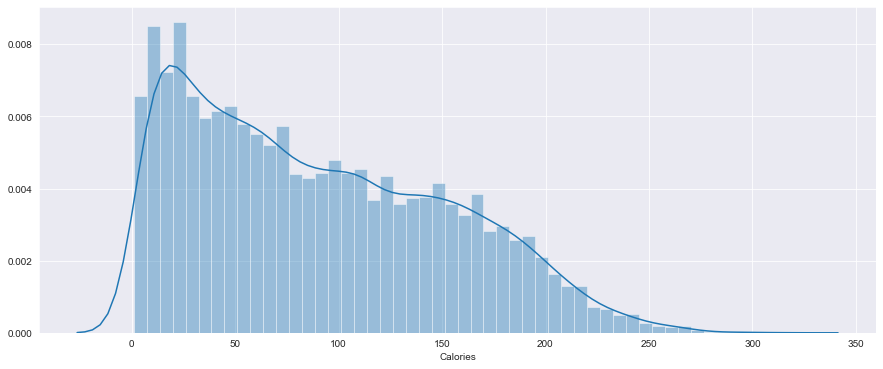

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.distplot(calories['Calories'],bins=50)

In [7]:
df = pd.merge(calories, exercies, on = 'User_ID')
df = df[df['Calories']<300]
df.reset_index()
#df['Intercept'] = 1
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     14998 non-null  int64  
 1   Calories    14998 non-null  float64
 2   Gender      14998 non-null  object 
 3   Age         14998 non-null  int64  
 4   Height      14998 non-null  float64
 5   Weight      14998 non-null  float64
 6   Duration    14998 non-null  float64
 7   Heart_Rate  14998 non-null  float64
 8   Body_Temp   14998 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,14998.0,1.497731e+07,2.872925e+06,10001159.0,12474036.25,14997285.0,17448895.75,19999647.0
Calories,14998.0,8.951053e+01,6.241058e+01,1.0,35.00,79.0,138.00,295.0
Age,14998.0,4.278590e+01,1.697801e+01,20.0,28.00,39.0,56.00,79.0
Height,14998.0,1.744623e+02,1.425685e+01,123.0,164.00,175.0,185.00,222.0
Weight,14998.0,7.496400e+01,1.503442e+01,36.0,63.00,74.0,87.00,132.0
Duration,14998.0,1.552887e+01,8.318408e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,14998.0,9.551500e+01,9.579079e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,14998.0,4.002535e+01,7.792228e-01,37.1,39.60,40.2,40.60,41.5


<AxesSubplot:>

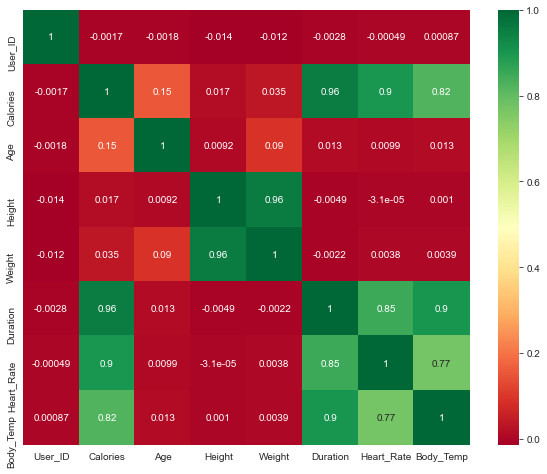

In [10]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

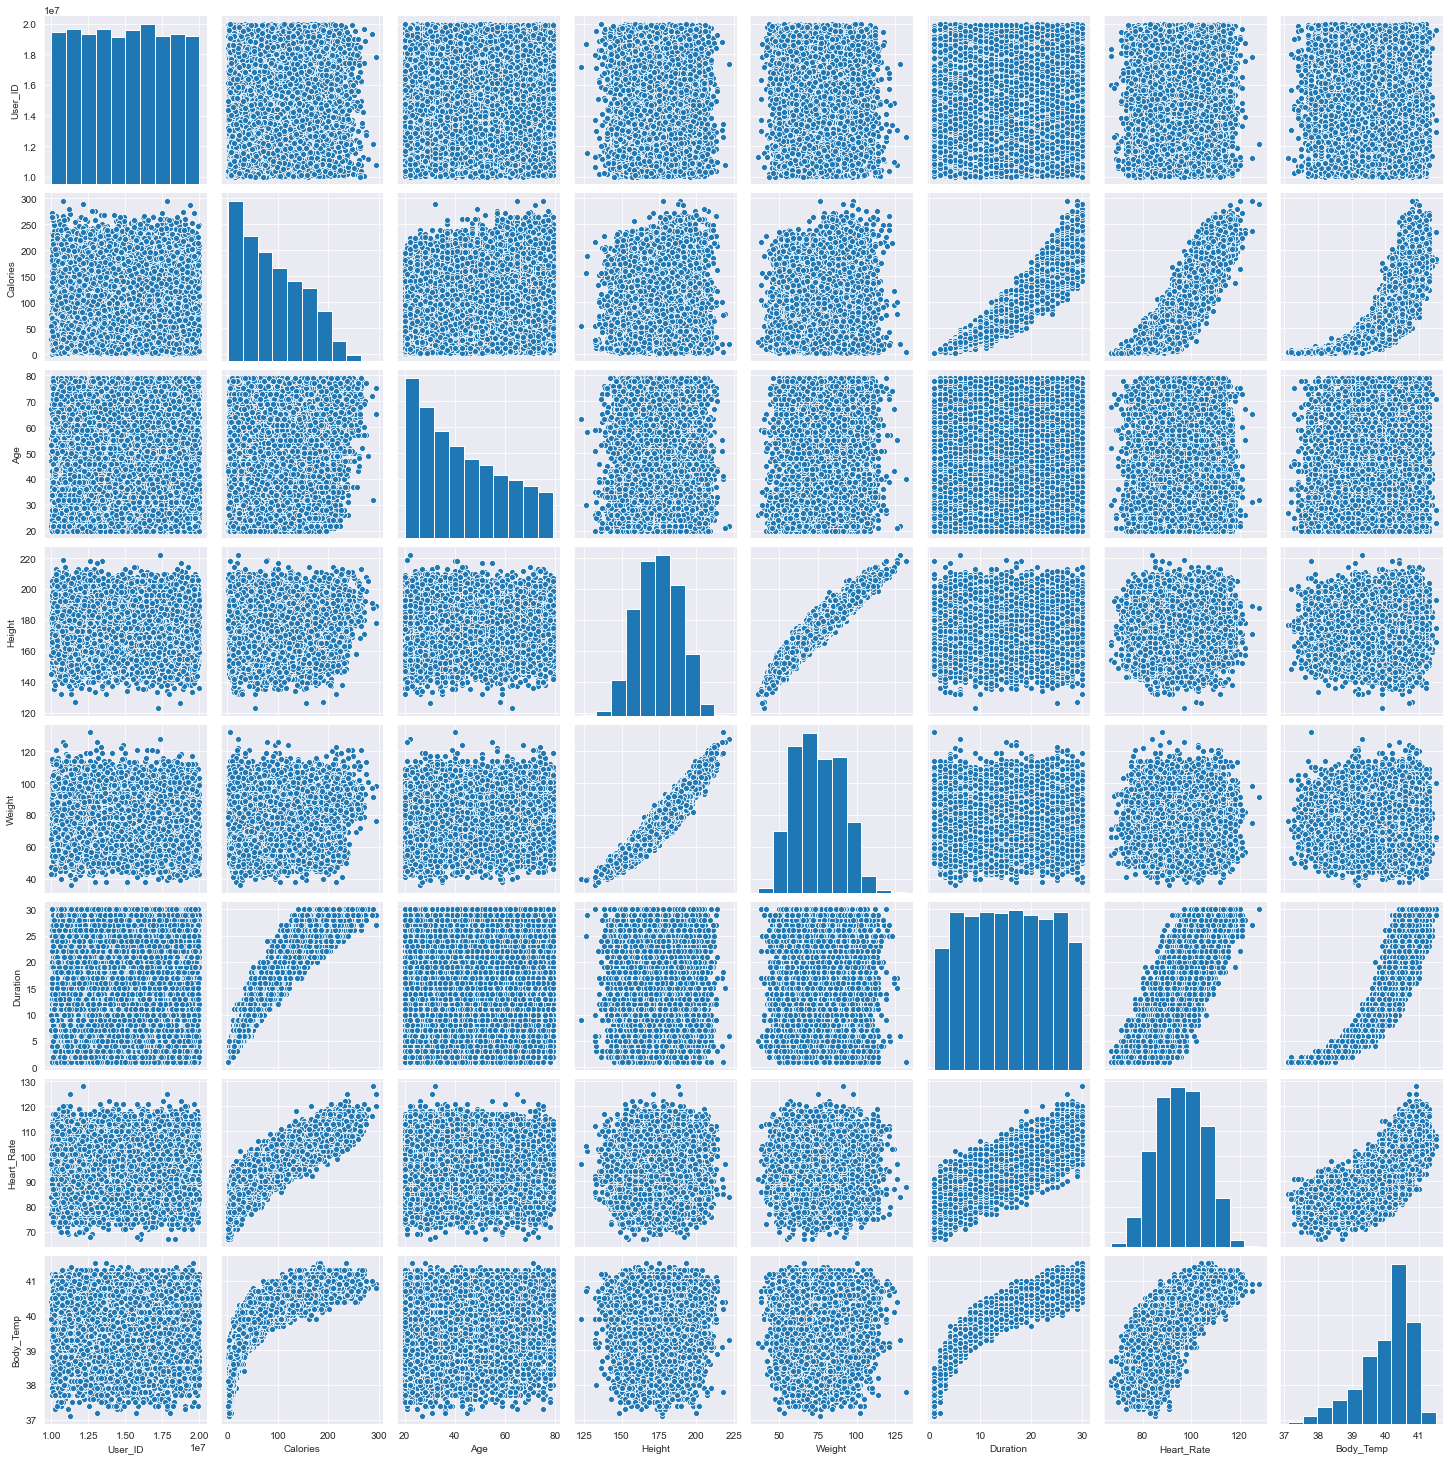

In [11]:
sns.pairplot(df)

<Figure size 720x432 with 0 Axes>

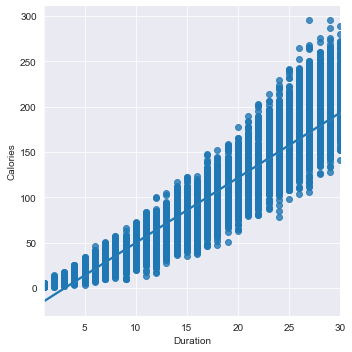

In [12]:
plt.figure(figsize=(10,6))
sns.lmplot(data=df, x='Duration', y='Calories')

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Gender']

0        1
1        0
2        1
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    1
14999    1
Name: Gender, Length: 14998, dtype: int32

In [14]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,0,27,154.0,58.0,10.0,81.0,39.8


In [15]:
X = df.drop(['Calories'], axis=1)
y = df['Calories']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = lin_reg.predict(X_test)

In [19]:
train_score=lin_reg.score(X_train, y_train)
test_score=lin_reg.score(X_test, y_test)
print(train_score ,test_score)

0.9674236017022754 0.9671154210635763


In [20]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

465.7032725759076
[ 7.72843352e-08 -1.27083961e+00  5.05244809e-01 -1.98625721e-01
  3.20617504e-01  6.65142250e+00  1.98733474e+00 -1.70090707e+01]


In [21]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9671154210635763


In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, max_iter=10e5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=1000000.0)

In [23]:
y_pred2 = lasso.predict(X_test) 

In [24]:
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print(np.sum(lasso.coef_!=0))

0.9673633695719661
0.9670714279828886
8


In [25]:
print(lasso.intercept_)
print(lasso.coef_)

425.715410989338
[ 7.58844241e-08 -7.36757138e-02  5.09560440e-01 -1.59902742e-01
  2.53094816e-01  6.56875263e+00  1.98631451e+00 -1.60367276e+01]


In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred2))

0.9670714279828886
